In [17]:
from pandas.api.extensions import (
    ExtensionArray,
    ExtensionDtype,
    register_dataframe_accessor,
    register_extension_dtype,
    register_series_accessor,
)
from physipy import Quantity, Dimension

In [4]:
import sys
sys.version

'3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]'

In [68]:
# Final usage : 
# pd.Series([1, 2, 2, 3], dtype="pint[rpm]") # revolution per minute


class PhysipyDimensionType(ExtensionDtype):
    
    # The interface includes the following abstract methods that must
    # be implemented by subclasses:
    # * type
    # * name
    type = Dimension

    # --> see __hash__
    _metadata = ("dimension",)
    
    def __new__(cls, dimension):
        if isinstance(dimension, PhysipyDimensionType):
            return dimension
        else:
            return Dimension(dimension)
        
    
    @property
    def _is_numeric(self):
        return True
    @property
    def _is_boolean(self):
        return False
   # @property
   # def _get_common_dtype(self):
   #     pass
    
    # --> see type
    # @property
    # def name(self):
    #     return str("pint[{units}]".format(units=self.units))
    @property
    def name(self):
        return str(self.dimension)
    
    
    # Optionally one can override construct_array_type for construction
    # with the name of this dtype via the Registry. See
    # :meth:`extensions.register_extension_dtype`.
    # @classmethod
    # def construct_array_type(cls):
    #     return PintArray
    # register_extension_dtype(PintType)
    
    #@classmethod
    #def construct_array_type(cls) -> type_t[Categorical]:
    #    """
    #    Return the array type associated with this dtype.
    #    Returns
    #    -------
    #    type
    #    """
    #    from pandas import Categorical
    #    return Categorical
    
    @classmethod
    def construct_array_type(cls):
        return DimensionArray
    
    
    # The `na_value` class attribute can be used to set the default NA value
    # for this type. :attr:`numpy.nan` is used by default.
    #@property
    #def na_value(self):
    #    return self.ureg.Quantity(np.nan, self.units)
    @property
    def na_value(self):
        return Quantity(np.nan, self.dimension)
    
    
    # ExtensionDtypes are required to be hashable. The base class provides
    # a default implementation, which relies on the ``_metadata`` class
    # attribute. ``_metadata`` should be a tuple containing the strings
    # that define your data type. For example, with ``PeriodDtype`` that's
    # the ``freq`` attribute.
    # **If you have a parametrized dtype you should set the ``_metadata``
    # class property**.
    
    # def __hash__(self):
    #     # make myself hashable
    #     return hash(str(self))
    def __hash__(self):
        return hash(str(self))
    
    # Ideally, the attributes in ``_metadata`` will match the
    # parameters to your ``ExtensionDtype.__init__`` (if any). If any of
    # the attributes in ``_metadata`` don't implement the standard
    # ``__eq__`` or ``__hash__``, the default implementations here will not
    # work.
    #def __eq__(self, other):
    #    try:
    #        other = PintType(other)
    #    except (ValueError, errors.UndefinedUnitError):
    #        return False
    #    return self.units == other.units
    def __eq__(self, other):
        try:
            other = PhysipyDimensionType(other)
        except (ValueError):
            return False
        return self.dimension == other.dimension
    
    
    # def __repr__(self):
    #     """
    #     Return a string representation for this object.
    #     Invoked by unicode(df) in py2 only. Yields a Unicode String in both
    #     py2/py3.
    #     """
    #     return self.name
    def __repr__(self):
        return self.name
    
# for use with PhysipyDimensionType.construct_array_type
register_extension_dtype(PhysipyDimensionType)





# This class provides all the array-like functionality. ExtensionArrays are limited to 1 dimension.
# An ExtensionArray is linked to an ExtensionDtype via the dtype attribute.
# pandas makes no restrictions on how an extension array is created via its __new__ or __init__, and puts no restrictions on how you store your data.
# We do require that your array be convertible to a NumPy array, even if this is relatively expensive (as it is for Categorical).

#The interface includes the following abstract methods that must be
#    implemented by subclasses:
#    * _from_sequence
#    * _from_factorized
#    * __getitem__
#    * __len__
#    * __eq__
#    * dtype
#    * nbytes
#    * isna
#    * take
#    * copy
#    * _concat_same_type

from pandas.core.arrays.base import ExtensionOpsMixin

# class PintArray(ExtensionArray, ExtensionOpsMixin)
class PhysipyQuantityArray(ExtensionArray, ExtensionOpsMixin):


    # def __init__(self, values, dtype=None, copy=False):
    #     if dtype is None:
    #         raise NotImplementedError

    #     if not isinstance(dtype, PintType):
    #         dtype = PintType(dtype)
    #     self._dtype = dtype
    #     if len(values) > 0 and all([not isinstance(x, float) for x in values]):
    #         data_dtype = next(x for x in values if not isinstance(x, float))
    #         warnings.warn(
    #             f"pint-pandas does not support magnitudes of {type(data_dtype)}. Converting magnitudes to float.",
    #             category=RuntimeWarning,
    #         )
    #     self._data = np.array(values, float, copy=copy)
    #     self._Q = self.dtype.ureg.Quantity
    def __init__(self, values, dtype=None, copy=False):
        if dtype is None:
            raise NotImplementedError
        if not isinstance(dtype, PhysipyDimensionType):
            dtype = PhysipyDimensionType(dtype)
        self._dtype = dtype
        self._data = np.array(values)

    @property
    def dimension(self):
        return self._dtype
        
    
    #@classmethod
    #def _from_sequence(cls, scalars, dtype=None, copy=False):
    #    """
    #    Initialises a PintArray from a list like of quantity scalars or a list like of floats and dtype
    #    -----
    #    Usage
    #    PintArray._from_sequence([Q_(1,"m"),Q_(2,"m")])
    #    """
    @classmethod
    def _from_sequence(cls, scalars, dtype=None, copy=False):
        pass

        
    # @property
    # def dtype(self):
    #     # type: () -> ExtensionDtype
    #     """An instance of 'ExtensionDtype'."""
    #     return self._dtype
    @property
    def dtype(self):
        return self._dtype
    
    #@property
    #def nbytes(self):
    #    return self._data.nbytes
    @property
    def nbytes(self):
        return self._data.nbytes
    
    
    #def isna(self):
    #    # type: () -> np.ndarray
    #    """Return a Boolean NumPy array indicating if each value is missing.
    #    Returns
    #    -------
    #    missing : np.array
    #    """
    #    return np.isnan(self._data)
    def isna(self):
        return np.isnan(self._data)
    
    
    
    #def take(self, indices, allow_fill=False, fill_value=None):
    #    """Take elements from an array.
    #    # type: (Sequence[int], bool, Optional[Any]) -> PintArray
    #    Parameters
    #    ----------
    #    indices : sequence of integers
    #        Indices to be taken.
    #    allow_fill : bool, default False
    #        How to handle negative values in `indices`.
    #        * False: negative values in `indices` indicate positional indices
    #          from the right (the default). This is similar to
    #          :func:`numpy.take`.
    #        * True: negative values in `indices` indicate
    #          missing values. These values are set to `fill_value`. Any other
    #          other negative values raise a ``ValueError``.
    #    fill_value : any, optional
    #        Fill value to use for NA-indices when `allow_fill` is True.
    #        This may be ``None``, in which case the default NA value for
    #        the type, ``self.dtype.na_value``, is used.
    #    Returns
    #    -------
    #    PintArray
    #    Raises
    #    ------
    #    IndexError
    #        When the indices are out of bounds for the array.
    #    ValueError
    #        When `indices` contains negative values other than ``-1``
    #        and `allow_fill` is True.
    #    Notes
    #    -----
    #    PintArray.take is called by ``Series.__getitem__``, ``.loc``,
    #    ``iloc``, when `indices` is a sequence of values. Additionally,
    #    it's called by :meth:`Series.reindex`, or any other method
    #    that causes realignemnt, with a `fill_value`.
    #    See Also
    #    --------
    #    numpy.take
    #    pandas.api.extensions.take
    #    Examples
    #   --------
    #   """
    #   from pandas.core.algorithms import take

    #   data = self._data
    #   if allow_fill and fill_value is None:
    #       fill_value = self.dtype.na_value
    #   if isinstance(fill_value, _Quantity):
    #       fill_value = fill_value.to(self.units).magnitude

    #   result = take(data, indices, fill_value=fill_value, allow_fill=allow_fill)

    #   return PintArray(result, dtype=self.dtype)
    def take(self, indices, allow_fill=False, fill_value=None):
        from pandas.core.algorithms import take
        data = self._data
        if allow_fill and fill_value is None:
            fill_value = self.dtype.na_value
        if isinstance(fill_value, Quantity):
            fill_value = fill_value.value
        result = take(data, indices, fill_value=fill_value, allow_fill=allow_fill)
        return PhysipyQuantityArray(result, dtype=self.dtype)


    #def copy(self, deep=False):
    #    data = self._data
    #    if deep:
    #        data = copy.deepcopy(data)
    #    else:
    #        data = data.copy()
    #    return type(self)(data, dtype=self.dtype)
    def copy(self, deep=False):
        data = self._data
        if deep:
            data = copy.deepcopy(data)
        else:
            data = data.copy()

        return type(self)(data, dtype=self.dtype)
    
    # @property
    # def quantity(self):
    #     return self._Q(self.data, self._dtype.units)
    @property
    def _quantify(self):
        return Quantity(self._data, self._dtype)
    
    #@classmethod
    #def _concat_same_type(cls, to_concat):
    #    output_units = to_concat[0].units
    #    data = []
    #    for a in to_concat:
    #        converted_values = a.quantity.to(output_units).magnitude
    #        data.append(np.atleast_1d(converted_values))
    #    return cls(np.concatenate(data), output_units)
    @classmethod
    def _concat_same_type(cls, to_concat):
        output_units = to_concat[0].dimension
        data = []
        for a in to_concat:
            converted_values = a._quantity.value
            data.append(np.atleast_1d(converted_values))
        return cls(np.concatenate(data), output_units)
    
    
    def __repr__(self):
        s=  f"""<PhysipyQuantityArray>
{self._quantify}
Length: 10, dtype: L""".format()
        return s
    
    #def __len__(self):
    #    # type: () -> int
    #    """Length of this array
    #    Returns
    #    -------
    #    length : int
    #    """
    #    return len(self._data)
    def __len__(self):
        return len(self._data)
    
    #def __getitem__(self, item):
    #    # type (Any) -> Any
    #    """Select a subset of self.
    #    Parameters
    #    ----------
    #    item : int, slice, or ndarray
    #        * int: The position in 'self' to get.
    #        * slice: A slice object, where 'start', 'stop', and 'step' are
    #          integers or None
    #        * ndarray: A 1-d boolean NumPy ndarray the same length as 'self'
    #    Returns
    #    -------
    #    item : scalar or PintArray
    #    """
    #    if is_integer(item):
    #        return self._data[item] * self.units
    #    item = check_array_indexer(self, item)
    #    return self.__class__(self._data[item], self.dtype)
    def __getitem__(self, item):
        from pandas.core.indexers import check_array_indexer
        from pandas.api.types import is_integer
        if is_integer(item):
            return Quantity(self._data[item], self.dimension)
        item = check_array_indexer(self, item)
        return self.__class__(self._data[item], self.dtype)        

In [69]:
dim_type = PhysipyDimensionType("L")
dim_type_2 = PhysipyDimensionType("M")

In [70]:
print(dim_type, dim_type_2)
print(dim_type == dim_type_2)

L M
False


In [71]:
physerie = PhysipyQuantityArray(np.arange(10)*m, dtype="L")
physerie

<PhysipyQuantityArray>
[0 1 2 3 4 5 6 7 8 9] m
Length: 10, dtype: L

In [72]:
print(physerie)

<PhysipyQuantityArray>
[0 1 2 3 4 5 6 7 8 9] m
Length: 10, dtype: L


In [73]:
df = pd.DataFrame({
    "torque": physerie,
})

AttributeError: 'Dimension' object has no attribute 'type'

In [121]:
import pandas as pd
import pint
import pint_pandas

PA_ = pint_pandas.PintArray
ureg = pint.UnitRegistry()
Q_=ureg.Quantity

df = pd.DataFrame({
    "torque": pd.Series([1.2, 2, 2, 3], dtype="pint[lbf ft]"),
    "angular_velocity": pd.Series([1, 2., 2, 3], dtype="pint[rpm]"),
})
df['power'] = df['torque'] * df['angular_velocity']
print(df)
print(df.dtypes)

df.power

df.power.values

df.power.values.quantity

df = pd.DataFrame({
        "length" : pd.Series([1.,2], dtype="pint[m]"),
        "width" : PA_([2,.3], dtype="pint[m]"),
        "distance" : PA_([2.,3], dtype="m"),
        "height" : PA_([2,.3], dtype=ureg.m),
        "depth" : PA_.from_1darray_quantity(Q_([2,.3],ureg.m)),
    })
df




  torque angular_velocity power
0    1.2              1.0   1.2
1    2.0              2.0   4.0
2    2.0              2.0   4.0
3    3.0              3.0   9.0
torque                                       pint[foot * force_pound]
angular_velocity                         pint[revolutions_per_minute]
power               pint[foot * force_pound * revolutions_per_minute]
dtype: object


,length,width,distance,height,depth
0,1.0,2.0,2.0,2.0,2.0
1,2.0,0.3,3.0,0.3,0.3


In [122]:
print(pd.Series([1.2, 2, 2, 3], dtype="pint[lbf ft]"))

0    1.2
1    2.0
2    2.0
3    3.0
dtype: pint[foot * force_pound]


In [123]:
Q_([2,.3],ureg.m)

Magnitude,[2.0 0.3]
Units,meter


In [124]:
a = pd.Series(Q_([2,.3],ureg.m)) # downcast to float
b = pd.Series(Q_([2,.3],ureg.m), dtype="pint[m]") # ok
#pd.Series(Q_([2,.3],ureg.m), dtype="pint[s]") # fails to convert units
a + a

C:\Users\t0160971\MyApp\winpython\WPy64-3830\python-3.8.3.amd64\lib\site-packages\pandas\core\dtypes\cast.py:1302: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  v = np.array(v, copy=False)
C:\Users\t0160971\MyApp\winpython\WPy64-3830\python-3.8.3.amd64\lib\site-packages\pandas\core\dtypes\cast.py:1672: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  subarr = np.array(values, dtype=dtype, copy=copy)


0    4.0
1    0.6
dtype: float64

In [125]:
df = pd.DataFrame({
    "test":Q_([2,.3],ureg.m),
})
df

,test
0,2.0
1,0.3


In [126]:
a = [2,3]*ureg.m
print(a)
print(a.type)

[2 3] meter


AttributeError: Neither Quantity object nor its magnitude ([2 3]) has attribute 'type'

In [76]:
df = pd.DataFrame({"t":np.arange(10)*mm})
df

,t
0,0.000
1,0.001
2,0.002
3,0.003
4,0.004
5,0.005
6,0.006
7,0.007
8,0.008
9,0.009


In [82]:
import pint
ureg = pint.UnitRegistry()

arr = np.arange(10)*ureg.m
print(arr)

[0 1 2 3 4 5 6 7 8 9] meter


In [83]:
pd.__version__

'1.0.3'

# Decimal

In [39]:
import physipy
from physipy import Quantity, Dimension, quantify, units
from physipy.quantity.utils import asqarray

import pandas as pd
m = units["m"]


import decimal

import numpy as np

from pandas.core.arrays import ExtensionArray
from pandas.core.dtypes.base import ExtensionDtype


class DecimalDtype(ExtensionDtype):
    """A custom data type, to be paired with an ExtensionArray."""

    type = decimal.Decimal
    name = "decimal"
    na_value = decimal.Decimal("NaN")

    @classmethod
    def construct_array_type(cls):
        """Return the array type associated with this dtype."""
        return DecimalArray

    
class QuantityDtype(ExtensionDtype):
    """A custom data type, to be paired with an ExtensionArray."""

    type = Quantity
    name = "quantitydtype"
    _metadata = ("unit",)
    na_value = Quantity(np.nan, Dimension(None))

    @classmethod
    def construct_array_type(cls):
        """Return the array type associated with this dtype."""
        return QuantityArray
    
    
    #############################
    #######  To print the unit under the values when repr-ed
    
    def __new__(cls, unit=None):
        print(f"New with {type(unit)} : {unit}")
        if isinstance(unit, QuantityDtype):
            return unit
        elif isinstance(unit, Quantity):
            #qdtype_unit = QuantityDtype(unit)
            u = object.__new__(cls)
            u.unit = unit
            return u
        else:
            raise ValueError
    
    @property
    def name(self):
        return f"physipy[{self.unit.dimension.str_SI_unit()}]"
    
    @property
    def dimension(self):
        return self.unit.dimension
    
    ####################
    


class DecimalArray(ExtensionArray):
    """Abstract base class for custom 1-D array types."""

    def __init__(self, values, dtype=None, copy=False):
        """Instantiate the array.
        If you're doing any type coercion in here, you will also need
        that in an overwritten __settiem__ method.
        But, here we coerce the input values into Decimals.
        """
        values = [decimal.Decimal(val) for val in values]
        self._data = np.asarray(values, dtype=object)
        self._dtype = DecimalDtype()

    @classmethod
    def _from_sequence(cls, scalars, dtype=None, copy=False):
        """Construct a new ExtensionArray from a sequence of scalars."""
        return cls(scalars, dtype=dtype)

    @classmethod
    def _from_factorized(cls, values, original):
        """Reconstruct an ExtensionArray after factorization."""
        return cls(values)

    def __getitem__(self, item):
        """Select a subset of self."""
        return self._data[item]

    def __len__(self) -> int:
        """Length of this array."""
        return len(self._data)

    @property
    def nbytes(self):
        """The byte size of the data."""
        return self._itemsize * len(self)

    @property
    def dtype(self):
        """An instance of 'ExtensionDtype'."""
        return self._dtype

    def isna(self):
        """A 1-D array indicating if each value is missing."""
        return np.array([x.is_nan() for x in self._data], dtype=bool)

    def take(self, indexer, allow_fill=False, fill_value=None):
        """Take elements from an array.
        Relies on the take method defined in pandas:
        https://github.com/pandas-dev/pandas/blob/e246c3b05924ac1fe083565a765ce847fcad3d91/pandas/core/algorithms.py#L1483
        """
        from pandas.api.extensions import take

        data = self._data
        if allow_fill and fill_value is None:
            fill_value = self.dtype.na_value

        result = take(
            data, indexer, fill_value=fill_value, allow_fill=allow_fill)
        return self._from_sequence(result)

    def copy(self):
        """Return a copy of the array."""
        return type(self)(self._data.copy())

    @classmethod
    def _concat_same_type(cls, to_concat):
        """Concatenate multiple arrays."""
        return cls(np.concatenate([x._data for x in to_concat]))

    
from pandas.core.arrays.base import ExtensionOpsMixin
# for ExtensionOpsMixin
from pandas.api.types import is_list_like


class QuantityArray(ExtensionArray,
                    # for operations between series for ex
                    # see https://github.com/pandas-dev/pandas/blob/21d61451ca363bd4c67dbf284b29daacc30302b1/pandas/core/arrays/base.py#L1330
                    # must define _create_arithmetic_method(cls, op) for ex
                   ExtensionOpsMixin):
    """Abstract base class for custom 1-D array types."""

    def __init__(self, values, dtype=None, copy=False):
        """Instantiate the array.
        If you're doing any type coercion in here, you will also need
        that in an overwritten __settiem__ method.
        But, here we coerce the input values into Decimals.
        """
        values = quantify(values)
        self._data = values
        # Must pass the dimension to create a "custom" QuantityDtype, that displays with the proper unit
        #self._dtype = QuantityDtype()
        self._dtype = QuantityDtype(values._SI_unitary_quantity)

    @classmethod
    def _from_sequence(cls, scalars, dtype=None, copy=False):
        """Construct a new ExtensionArray from a sequence of scalars."""
        values = asarray(scalars)
        return cls(scalars, dtype=dtype)

    @classmethod
    def _from_factorized(cls, values, original):
        """Reconstruct an ExtensionArray after factorization."""
        return cls(values)

    def __getitem__(self, item):
        """Select a subset of self.
        
        Called by : print(df["quanti"].values)
        """
        return self._data[item]

    def __len__(self) -> int:
        """Length of this array."""
        return len(self._data)

    @property
    def nbytes(self):
        """The byte size of the data."""
        return self._itemsize * len(self)

    @property
    def dtype(self):
        """An instance of 'ExtensionDtype'."""
        return self._dtype

    def _formatter(self, boxed=False):
        """Formatting function for scalar values.
        This is used in the default '__repr__'. The returned formatting
        function receives scalar Quantities.
        # type: (bool) -> Callable[[Any], Optional[str]]
        Parameters
        ----------
        boxed: bool, default False
            An indicated for whether or not your array is being printed
            within a Series, DataFrame, or Index (True), or just by
            itself (False). This may be useful if you want scalar values
            to appear differently within a Series versus on its own (e.g.
            quoted or not).
        Returns
        -------
        Callable[[Any], str]
            A callable that gets instances of the scalar type and
            returns a string. By default, :func:`repr` is used
            when ``boxed=False`` and :func:`str` is used when
            ``boxed=True``.
        """


        def formatting_function(quantity):
            return "{}".format(
                quantity
            )

        return formatting_function
    
    
    def isna(self):
        """A 1-D array indicating if each value is missing."""
        return np.array([x.is_nan() for x in self._data], dtype=bool)

    def take(self, indexer, allow_fill=False, fill_value=None):
        """Take elements from an array.
        Relies on the take method defined in pandas:
        https://github.com/pandas-dev/pandas/blob/e246c3b05924ac1fe083565a765ce847fcad3d91/pandas/core/algorithms.py#L1483
        """
        from pandas.api.extensions import take

        data = self._data
        if allow_fill and fill_value is None:
            fill_value = self.dtype.na_value

        result = take(
            data, indexer, fill_value=fill_value, allow_fill=allow_fill)
        return self._from_sequence(result)

    def copy(self):
        """Return a copy of the array."""
        return type(self)(self._data.copy())

    @classmethod
    def _concat_same_type(cls, to_concat):
        """Concatenate multiple arrays."""
        return cls(np.concatenate([x._data for x in to_concat]))
    
    
    
    
    
    ###################################
    ##### ExtensionOpsMixin
    ###################################
    @property
    def quantity(self):
        return self._data
    
    @classmethod
    def _create_method(cls, op, coerce_to_dtype=True):
        """
        A class method that returns a method that will correspond to an
        operator for an ExtensionArray subclass, by dispatching to the
        relevant operator defined on the individual elements of the
        ExtensionArray.
        Parameters
        ----------
        op : function
            An operator that takes arguments op(a, b)
        coerce_to_dtype :  bool
            boolean indicating whether to attempt to convert
            the result to the underlying ExtensionArray dtype
            (default True)
        Returns
        -------
        A method that can be bound to a method of a class
        Example
        -------
        Given an ExtensionArray subclass called MyExtensionArray, use
        >>> __add__ = cls._create_method(operator.add)
        in the class definition of MyExtensionArray to create the operator
        for addition, that will be based on the operator implementation
        of the underlying elements of the ExtensionArray
        """
        from pandas.compat import set_function_name

        def _binop(self, other):
            def validate_length(obj1, obj2):
                # validates length and converts to listlike
                try:
                    if len(obj1) == len(obj2):
                        return obj2
                    else:
                        raise ValueError("Lengths must match")
                except TypeError:
                    return [obj2] * len(obj1)

            def convert_values(param):
                # convert to a quantity or listlike
                if isinstance(param, cls):
                    return param.quantity
                elif isinstance(param, Quantity):
                    return param
                elif is_list_like(param) and isinstance(param[0], Quantity):
                    return type(param[0])([p.value for p in param], param[0].dimension)
                else:
                    return param

            if isinstance(other, (pd.Series, pd.DataFrame)):
                return NotImplemented
            lvalues = self.quantity
            other = validate_length(lvalues, other)
            rvalues = convert_values(other)
            # Pint quantities may only be exponented by single values, not arrays.
            # Reduce single value arrays to single value to allow power ops
            if isinstance(rvalues, Quantity):
                if len(set(np.array(rvalues.data))) == 1:
                    rvalues = rvalues[0]
            elif len(set(np.array(rvalues))) == 1:
                rvalues = rvalues[0]
            # If the operator is not defined for the underlying objects,
            # a TypeError should be raised
            res = op(lvalues, rvalues)

            if op.__name__ == "divmod":
                return (
                    cls.from_1darray_quantity(res[0]),
                    cls.from_1darray_quantity(res[1]),
                )

            if coerce_to_dtype:
                try:
                    #res = cls.from_1darray_quantity(res)
                    # enforce a Quantity object when a calculation leads to dimensionless
                    # hence physipy returns an array, not a dimensionless quantity (df["a"]/df["a"])
                    res = cls.from_1darray_quantity(quantify(res))
                except TypeError:
                    pass

            return res

        op_name = f"__{op}__"
        return set_function_name(_binop, op_name, cls)

    @classmethod
    def _create_arithmetic_method(cls, op):
        return cls._create_method(op)

    @classmethod
    def _create_comparison_method(cls, op):
        return cls._create_method(op, coerce_to_dtype=False)
    
    @classmethod
    def from_1darray_quantity(cls, quantity):
        if not is_list_like(quantity.value):
            raise TypeError("quantity's magnitude is not list like")
        return cls(quantity)
    
    #################### END ExtensionOpsMixin
    
    
    ##########################
    ##### For repr : must be convertible to numpy array
    def astype(self, dtype, copy=True):
        """Cast to a NumPy array with 'dtype'.
        Parameters
        ----------
        dtype : str or dtype
            Typecode or data-type to which the array is cast.
        copy : bool, default True
            Whether to copy the data, even if not necessary. If False,
            a copy is made only if the old dtype does not match the
            new dtype.
        Returns
        -------
        array : ndarray
            NumPy ndarray with 'dtype' for its dtype.
        """
        #if isinstance(dtype, str) and (
        #    dtype.startswith("physipy[")):
        #    dtype = QuantityDtype(dtype)
        if isinstance(dtype, QuantityDtype):
            if dtype == self._dtype and not copy:
                return self
            else:
                return QuantityArray(self.quantity.value, dtype)
        return self.__array__(dtype, copy)
    
    def __array__(self, dtype=None, copy=False):
        #if dtype is None or is_object_dtype(dtype):
        #    return self._to_array_of_quantity(copy=copy)
        #if (isinstance(dtype, str) and dtype == "string") or isinstance(
        #    dtype, pd.StringDtype
        #):
        #    return pd.array([str(x) for x in self.quantity], dtype=pd.StringDtype())
        #if is_string_dtype(dtype):
        #    return np.array([str(x) for x in self.quantity], dtype=str)
        return np.array(self._data.value, dtype=dtype, copy=copy)

    
# FOR ExtensionOpsMixin to work    
QuantityArray._add_arithmetic_ops()
QuantityArray._add_comparison_ops()
    

decimal_series = pd.Series(DecimalArray([0.1, 0.2, 0.3]))
quantity_series = pd.Series(QuantityArray([0.1, 0.2, 0.3]*m))
print(decimal_series)
df = pd.DataFrame({
    "decima":decimal_series,
    "quanti":quantity_series,
})

New with <class 'physipy.quantity.quantity.Quantity'> : 1 m
0    0.10000000000000000555111512312578270211815834...
1    0.20000000000000001110223024625156540423631668...
2    0.29999999999999998889776975374843459576368331...
dtype: decimal


In [40]:
print(df["quanti"].values)
print(df["quanti"].dtype)
print(df["decima"].values)
print(df["decima"].dtype)

<QuantityArray>
[0.1 m, 0.2 m, 0.3 m]
Length: 3, dtype: physipy[m]
physipy[m]
<DecimalArray>
[Decimal('0.1000000000000000055511151231257827021181583404541015625'),
  Decimal('0.200000000000000011102230246251565404236316680908203125'),
  Decimal('0.299999999999999988897769753748434595763683319091796875')]
Length: 3, dtype: decimal
decimal


In [41]:
df["quanti"]

0   0.1
1   0.2
2   0.3
Name: quanti, dtype: physipy[m]

In [42]:
print(df["quanti"])

0   0.1
1   0.2
2   0.3
Name: quanti, dtype: physipy[m]


In [43]:
print(df["quanti"]+df["quanti"])
print(df["quanti"]-df["quanti"])
print(df["quanti"]*df["quanti"])
print(df["quanti"]/df["quanti"])
print(df["quanti"]//df["quanti"])
print(df["quanti"]**2)

New with <class 'physipy.quantity.quantity.Quantity'> : 1 m
0   0.2
1   0.4
2   0.6
Name: quanti, dtype: physipy[m]
New with <class 'physipy.quantity.quantity.Quantity'> : 1 m
0   0.0
1   0.0
2   0.0
Name: quanti, dtype: physipy[m]
New with <class 'physipy.quantity.quantity.Quantity'> : 1 m**2
0   0.010000000000000002
1    0.04000000000000001
2                   0.09
Name: quanti, dtype: physipy[m**2]
New with <class 'physipy.quantity.quantity.Quantity'> : 1 
0   1.0
1   1.0
2   1.0
Name: quanti, dtype: physipy[]
New with <class 'physipy.quantity.quantity.Quantity'> : 1 m
0   1.0
1   1.0
2   1.0
Name: quanti, dtype: physipy[m]
New with <class 'physipy.quantity.quantity.Quantity'> : 1 m**2
0   0.010000000000000002
1    0.04000000000000001
2                   0.09
Name: quanti, dtype: physipy[m**2]


In [46]:
df["sum"] = df["quanti"]*2
df["sum"]

New with <class 'physipy.quantity.quantity.Quantity'> : 1 m
New with <class 'physipy.quantity.quantity.Quantity'> : 1 


0   0.2
1   0.4
2   0.6
Name: sum, dtype: physipy[]

In [35]:
a = pd.Series([1, 2, 3])
b = pd.Series([2., 3., 4.])
print(a)
print(a+b)
print(2*a)

0    1
1    2
2    3
dtype: int64
0    3.0
1    5.0
2    7.0
dtype: float64
0    2
1    4
2    6
dtype: int64


In [23]:
df = pd.DataFrame({"t":t*mm, "D":D, "N":N, "PSA":PSA, "gain":gain, "lmbda_min":lmbda_min, "lmbda_max":lmbda_max, "amp":amp, "cfac":cfac})
df.describe(percentiles=[.05, .25, .50, .75, .95])

,t,D,N,PSA,gain,lmbda_min,lmbda_max,amp,cfac
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000400,0.200021,2.004806,0.185460,400.110178,3.500174,5.150949,0.800150,97996.617132
std,0.000010,0.009962,0.112364,0.019390,30.270766,0.010015,0.100032,0.070210,16410.113219
min,0.000357,0.161341,1.677471,0.114823,279.764910,3.464349,4.778342,0.546872,52889.412907
5%,0.000383,0.183619,1.829759,0.154820,350.086133,3.483551,4.986039,0.683484,73334.376936
25%,0.000393,0.193494,1.925479,0.172120,380.053953,3.493515,5.083422,0.753196,86329.949899
50%,0.000400,0.200000,1.999785,0.184837,399.893551,3.500289,5.151204,0.800110,96627.663842
75%,0.000407,0.206643,2.076796,0.198460,420.322615,3.506895,5.216708,0.846779,108685.209297
95%,0.000417,0.216386,2.196128,0.218286,450.009328,3.516633,5.315087,0.915939,126857.179684
max,0.000439,0.239801,2.567116,0.256339,514.529666,3.535281,5.546579,1.059702,173161.276751


In [24]:
df = df/df.mean()-1
df.describe(percentiles=[.05, .25, .50, .75, .95])

,t,D,N,PSA,gain,lmbda_min,lmbda_max,amp,cfac
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.266709e-15,-2.741218e-15,-3.417822e-16,1.361988e-15,2.419021e-15,-1.222744e-15,5.083611e-15,-4.500189e-15,-7.998047e-17
std,2.529132e-02,4.980615e-02,5.604724e-02,1.045520e-01,7.565608e-02,2.861149e-03,1.942012e-02,8.774595e-02,1.674559e-01
min,-1.064858e-01,-1.933790e-01,-1.632748e-01,-3.808752e-01,-3.007803e-01,-1.023523e-02,-7.233747e-02,-3.165385e-01,-4.602935e-01
5%,-4.202302e-02,-8.199885e-02,-8.731351e-02,-1.652107e-01,-1.250257e-01,-4.748955e-03,-3.201551e-02,-1.458058e-01,-2.516642e-01
25%,-1.722158e-02,-3.262972e-02,-3.956836e-02,-7.192854e-02,-5.012676e-02,-1.902434e-03,-1.310965e-02,-5.868242e-02,-1.190517e-01
50%,8.217071e-05,-1.034423e-04,-2.504259e-03,-3.359092e-03,-5.414190e-04,3.298277e-05,4.940493e-05,-5.000238e-05,-1.396939e-02
75%,1.693880e-02,3.310958e-02,3.590907e-02,7.009498e-02,5.051718e-02,1.920322e-03,1.276639e-02,5.827533e-02,1.090710e-01
95%,4.170151e-02,8.181922e-02,9.543175e-02,1.770000e-01,1.247135e-01,4.702393e-03,3.186549e-02,1.447092e-01,2.945057e-01
max,9.711064e-02,1.988805e-01,2.804814e-01,3.821773e-01,2.859700e-01,1.003022e-02,7.680716e-02,3.243788e-01,7.670128e-01


In [25]:
import pandas as pd
@pd.api.extensions.register_dataframe_accessor("opt")
class MonteCarloAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj

    @staticmethod
    def _validate(obj):
        # verify there is a column latitude and a column longitude
        if "toto" not in obj.columns or "PSA" not in obj.columns:
            raise AttributeError("Must have 'N' and 'PSA'.")

    @property
    def mean_gain(self):
        # return the geographic center point of this DataFrame
        N = self._obj.N
        PSA = self._obj.PSA
        return float(N.mean()) * float(PSA.mean())

    def plot(self):
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(1, 2)
        axes[0].hist(self._obj.N)
        axes[0].hist(self._obj.PSA)
        

<ipython-input-25-490478b8dfaa>:3: UserWarning: registration of accessor <class '__main__.MonteCarloAccessor'> under name 'opt' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexistingattribute with the same name.
  class MonteCarloAccessor:


In [26]:
df.opt.mean_gain

AttributeError: Must have 'N' and 'PSA'.

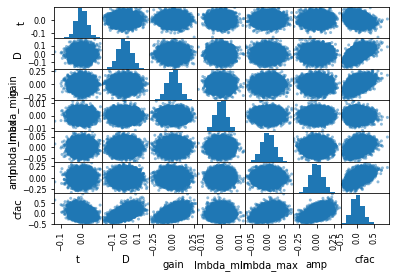

In [14]:
plots = pd.plotting.scatter_matrix(df[["t", "D", "gain", "lmbda_min", "lmbda_max", "amp", "cfac"]])

array([[<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'N'}>],
       [<AxesSubplot:title={'center':'PSA'}>,
        <AxesSubplot:title={'center':'gain'}>,
        <AxesSubplot:title={'center':'lmbda_min'}>],
       [<AxesSubplot:title={'center':'lmbda_max'}>,
        <AxesSubplot:title={'center':'amp'}>,
        <AxesSubplot:title={'center':'cfac'}>]], dtype=object)

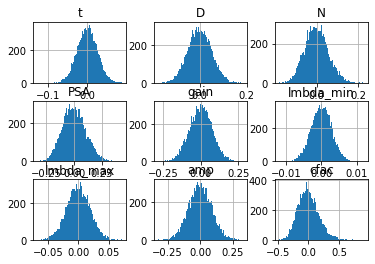

In [15]:
df.hist(bins=100)

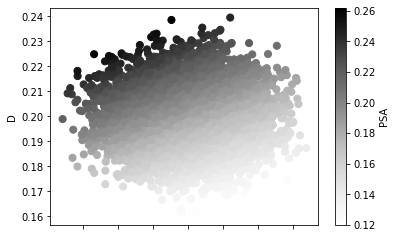

In [98]:
df.plot.scatter(x="t", y="D", c="PSA", s=50);

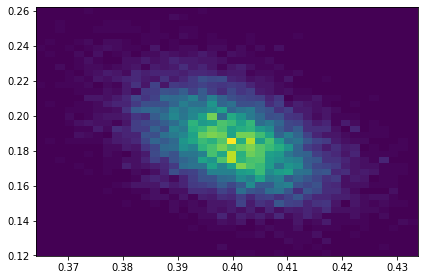

In [135]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(df["t"], df["PSA"], bins=40)

In [67]:
def kurt(x):
    """
    Returned is dimensionless
    Returned value approx to ss.kurtosis(x, fisher=False, bias=True)
    mu_4 / std_4
    """
    mn = x.mean()
    sd = x.std()
    #kt = 0.0 if np.abs(sd) <= 1e-8 else np.mean((x - mn) ** 4) / sd ** 4
    kt = np.mean((x - mn) ** 4) / sd ** 4
    return kt

def skew(x):
    """
    Returned is dimensionless
    Returned value approx to ss.skew(T, bias=True)
    mu_3 / std_3
    """
    mn = x.mean()
    sd = x.std()
    sk = np.mean((x - mn) ** 3) / sd ** 3
    return sk

def plot_dist_1D(dist, fit=False):
    """
    Plot a distribution
    use histogram
    use kde
    allow a fit by specific dstributuion : ex : fit="normal"
    print stats on graph
    add cdf
    add percentiles
    """
    pass

def summup_stats(*args):
    """Pile stats of iterable of rvs, with padded formating
    Use dataframe ?
    """
    pass

In [49]:
print(ss.kurtosis(T, fisher=False, bias=True))
print(kurt(T))

print(ss.skew(T, bias=True))
print(skew(T))

2.937023270585412
2.9370232705854113
0.008487332017701703
0.008487332017701715


In [50]:
print(T.mean()) # paramètre de position
print(T.var())  # paramètre d'échelle
print(T.std())  
print(kurt(T)) # paramètre de forme : "acuité"/"pic-ness"
print(skew(T)) # paramètre de forme : symétrie

272.9951281912942 K
8.97695066834274
2.9961559819780312 K
2.9370232705854113
0.008487332017701715
